# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')

In [9]:
# number of callbacks for black-sounding names
b_sound=sum(data[data.race=='b'].call)

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [7]:
##total 
b_tot=data[data.race=='b'].race.size
b_tot

2435

In [10]:
## % of blacks called
per_b=b_sound/b_tot*100
per_b

6.447638603696099

In [11]:
# of callbacks for white-sounding names
w_sound= sum(data[data.race=='w'].call)
w_sound

235.0

In [12]:
## % of whites called
w_tot=data[data.race=='w'].race.size
per_w=w_sound/w_tot*100
per_w

9.650924024640657

In [ ]:
## Question 1:this problem is a binomial distribution but testing for significance between black-sound names and white-sounding names should 
    # follow a normal distribution in which CLT is applicable. A two sample t-test is applicable for this test.
## Question 2: The null hypothesis is that there is no significant difference between call backs between black
    # or white sounding names on resumes. The alternative hypothesis would be that there is a significant relationship between
    # the names on resumes.

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [14]:
# Your solution to Q3 here
P1=per_b/100
n1=b_tot
var_b=(P1*(1-P1)/n1)
var_b

2.4771737856498466e-05

In [15]:
P2=per_w/100
n2=w_tot
var_w=(P2*(1-P2)/n2)
var_w

3.580911983304638e-05

In [18]:
var_b_w= var_b + var_w
var_b_w
std_b_w=np.sqrt(var_b_w)
std_b_w
abs(P1-P2)

0.032032854209445585

In [20]:
#margin of error
margin_err=1.96*std_b_w
margin_err

0.015255406349886438

In [21]:
min_P1_P2=abs(P1-P2)-margin_err
min_P1_P2

0.016777447859559147

In [22]:
max_P1_P2=abs(P1-P2)+margin_err
max_P1_P2

0.047288260559332024

In [23]:
ci = abs(P1-P2) + np.array([-1, 1]) * margin_err
ci

array([0.01677745, 0.04728826])

In [24]:
#standard error
SE=std_b_w
SE

0.0077833705866767544

In [25]:
B1=var_b/n1
W1=var_w/n2

DF=((B1+W1)**2)/(((B1**2)/n1)+((W1**2)/n2))
DF

4713.53819343226

In [27]:
t_val=((P1-P2)-0)/SE
t_val

p_value = stats.t.sf(np.abs(t_val), DF)*2  
p_value

3.9285451158654165e-05

In [28]:
bb=data[data.race=='b'].call
ww=data[data.race=='w'].call

In [29]:
stats.ttest_ind(bb,ww,equal_var=False)

Ttest_indResult(statistic=-4.114705290861751, pvalue=3.942941513645935e-05)

In [30]:
std_b=np.sqrt(var_b)
std_b

std_w=np.sqrt(var_w)
std_w

0.005984072178128066

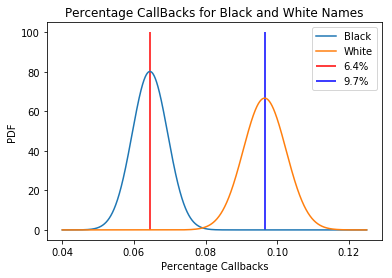

In [32]:
import pylab
x = np.linspace(0.04,0.125,4870)
y1 = stats.norm.pdf(x, loc=P1, scale=std_b)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=P2, scale=std_w)    
pylab.plot(x,y2)
pylab.xlabel('Percentage Callbacks')
pylab.ylabel('PDF')
pylab.vlines(P1,0, 100, color='red')
pylab.vlines(P2,0,100, color='blue')
pylab.legend(['Black', 'White', '6.4%', '9.7%'])
pylab.title('Percentage CallBacks for Black and White Names')
pylab.show()

In [ ]:
## The alternative hypothesis will be accpeted, as there appears to be a significant difference in the call backs based on name.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

In [ ]:
## From these results, it can be noted that resumes with white-sounding names do actually get callbacks more frequently than
     # resumes with black-sounding names.
    #While this analysis does reveal a stark contrast in the rate of callbacks between white-sounding and black-sounding resumes,
    # it can not be inferred that it is the most important factor in getting a callback. Other factors would have to be explored
    # and tested to see if they affect callback rates as well.  